In [80]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# File to Load 
mouse_drug_data = "/Users/miguelvelez/Desktop/mouse_data.csv"
clinical_trial_data = "/Users/miguelvelez/Desktop/study_results.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data)
clinical_data = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset

combined_data = pd.merge(drug_data, clinical_data, how="inner", on="Mouse ID")

# Display the data table for preview

combined_data.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# OK so now store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_group = combined_data.groupby(["Drug Regimen", "Timepoint"])

tumor_mean = drug_group["Tumor Volume (mm3)"].mean()

# Now lets Convert to DataFrame

tumor_mean_df = pd.DataFrame(tumor_mean)
tumor_avg_df = tumor_mean_df.reset_index(level=['Drug Regimen', 'Timepoint'])
# Preview DataFrame
tumor_avg_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


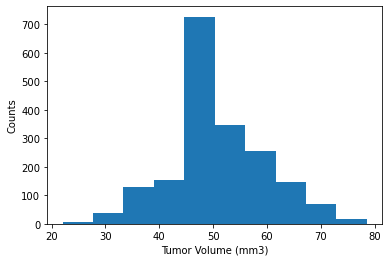

Mean of the study results is: 50.45
Median of the study results is: 48.95
Mode of the study results is: 0    45.0
dtype: float64
NormaltestResult(statistic=1.3178233323944966, pvalue=0.5174141474786702)


In [82]:
# Plot the data for the study results as a histogram and test it to see if it is normally distributed
plt.hist(clinical_data['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(f"Mean of the study results is: {round(clinical_data['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median of the study results is: {round(clinical_data['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode of the study results is: {round(clinical_data['Tumor Volume (mm3)'].mode(),2)}")
print(stats.normaltest(clinical_data['Tumor Volume (mm3)'].sample(100)))


In [83]:
# Store the SEM of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = drug_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

tumor_sem = pd.DataFrame(tumor_sem)
tumor_sem_df = tumor_sem.reset_index(level=['Drug Regimen', 'Timepoint'])

# Preview DataFrame

tumor_sem_df.head()


,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [84]:
# Now lets do some Data Munging to Re-Format the Data Frames
reformatted_tumor = pd.DataFrame(tumor_avg_df.iloc[0:10, 1]).set_index("Timepoint")
reformatted_sem = pd.DataFrame(tumor_sem_df.iloc[0:10, 1]).set_index("Timepoint")
num_drugs = 10
for i in range(0, num_drugs):
    reformatted_tumor[tumor_avg_df.iloc[(i*num_drugs),0]] = tumor_avg_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1,2]].set_index("Timepoint")
    reformatted_sem[tumor_sem_df.iloc[(i*num_drugs),0]] = tumor_sem_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1,2]].set_index("Timepoint")
# Preview that Reformatting worked
reformatted_tumor
reformatted_sem

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


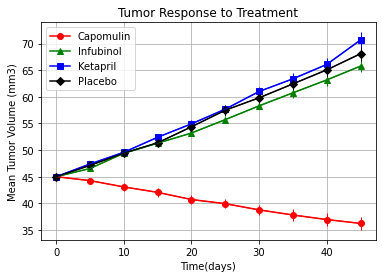

In [85]:
# Plotting time! Generate the Plot
# Create a list of the timepoints that will be on x-axis
timepoints = list(range(0,46,5))

# Plot lines for (4) different drugs/placebfig, ax = plt.subplots()
plt.plot(timepoints, reformatted_tumor["Capomulin"], marker='o', color="red", label = "Capomulin")
plt.errorbar(timepoints, reformatted_tumor["Capomulin"], reformatted_sem["Capomulin"], linewidth=1, color='r', label=None)

plt.plot(timepoints, reformatted_tumor["Infubinol"], marker='^', color="green", label = "Infubinol")
plt.errorbar(timepoints, reformatted_tumor["Infubinol"], reformatted_sem["Infubinol"], linewidth=1, color='g', label=None)

plt.plot(timepoints, reformatted_tumor["Ketapril"], marker='s', color="blue", label = "Ketapril")
plt.errorbar(timepoints, reformatted_tumor["Ketapril"], reformatted_sem["Ketapril"], linewidth=1, color='blue', label=None)

plt.plot(timepoints, reformatted_tumor["Placebo"], marker='D', color="black", label = "Placebo")
plt.errorbar(timepoints, reformatted_tumor["Placebo"], reformatted_sem["Placebo"], linewidth=1, color='black', label=None)


# Format the plot
plt.title("Tumor Response to Treatment")
plt.legend(loc="Best")
plt.xlabel("Time(days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.grid()

# Save figure
#savefig("Images/TumorResponse.png")

#exportgraphics(f,'plotchart.png','Resolution',300)

plt.show()

In [86]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_group = combined_data.groupby(["Drug Regimen", "Timepoint"])
meta_mean = drug_group["Metastatic Sites"].mean()
# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)
meta_avg_df = meta_mean_df.reset_index(level=['Drug Regimen', 'Timepoint'])
# Preview DataFrame
meta_avg_df

,Drug Regimen,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [87]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = drug_group["Metastatic Sites"].sem()
# Convert to DataFrame
meta_sem = pd.DataFrame(meta_sem)
meta_sem_df = meta_sem.reset_index(level=['Drug Regimen', 'Timepoint'])
# Preview DataFrame
meta_sem_df.head()


,Drug Regimen,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [88]:
# Reformat data frames 
reformatted_meta = pd.DataFrame(meta_avg_df.iloc[0:10, 1]).set_index("Timepoint")
reformatted_meta_sem = pd.DataFrame(meta_sem_df.iloc[0:10, 1]).set_index("Timepoint")
num_drugs = 10
for i in range(0, num_drugs):
    reformatted_meta[meta_avg_df.iloc[(i*num_drugs),0]] = meta_avg_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1,2]].set_index("Timepoint")
    reformatted_meta_sem[meta_sem_df.iloc[(i*num_drugs),0]] = meta_sem_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1,2]].set_index("Timepoint")
# Preview that Reformatting worked
reformatted_meta
reformatted_meta_sem


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.222607,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.232210,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.243426,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.255728,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


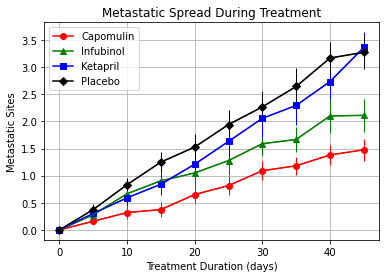

In [89]:
# Generate the Plot (with Error Bars)
# Create a list of the timepoints that will be on x-axis
timepoints = list(range(0,46,5))

# Plot lines for (4) different drugs/placebfig, ax = plt.subplots()
plt.plot(timepoints, reformatted_meta["Capomulin"], marker='o', color="red", label = "Capomulin")
plt.errorbar(timepoints, reformatted_meta["Capomulin"], reformatted_meta_sem["Capomulin"], linewidth=1, color='r', label=None)

plt.plot(timepoints, reformatted_meta["Infubinol"], marker='^', color="green", label = "Infubinol")
plt.errorbar(timepoints, reformatted_meta["Infubinol"], reformatted_meta_sem["Infubinol"], linewidth=1, color='g', label=None)

plt.plot(timepoints, reformatted_meta["Ketapril"], marker='s', color="blue", label = "Ketapril")
plt.errorbar(timepoints, reformatted_meta["Ketapril"], reformatted_meta_sem["Ketapril"], linewidth=1, color='blue', label=None)

plt.plot(timepoints, reformatted_meta["Placebo"], marker='D', color="black", label = "Placebo")
plt.errorbar(timepoints, reformatted_meta["Placebo"], reformatted_meta_sem["Placebo"], linewidth=1, color='black', label=None)

# Format plot
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="Best")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Metastatic Sites")
plt.grid()
#plt.savefig("Images/MetastaticSpread.png")
plt.show()




In [90]:
print("Surviving Rates")


Surviving Rates


In [91]:
# Generate a summary statistics table by chaining .groupby(), .agg() and .round() methods

drug_group_stats = combined_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', stats.sem)).round(3)
# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


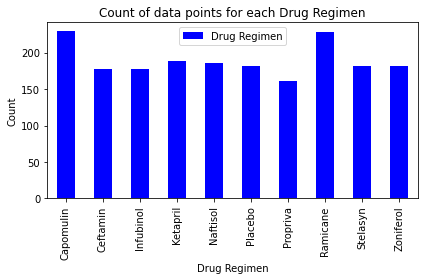

In [92]:

# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = combined_data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
# Save the figure
#plt.savefig("figures/PandaBarChart.png")


plt.show()

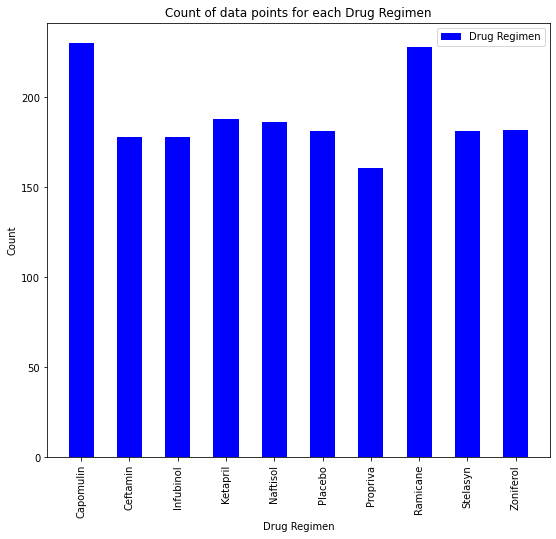

In [93]:
#do the same but with pyplot
# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

# Save the figure
#plt.savefig("figures/PyplotBarChart.png")
plt.show()

In [94]:
# First create a dataframe grouping by the 'Sex' column
gender_group = combined_data.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()

,Sex
Sex,
Female,935
Male,958


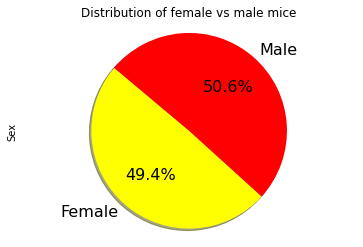

In [95]:
#pandas pie
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female vs male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["yellow","red"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
#plt.savefig("figures/PandaPieChart.png")
plt.show()

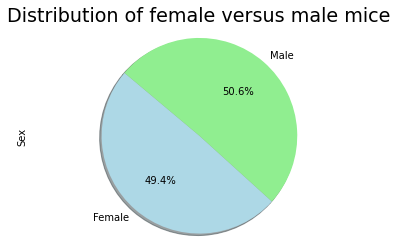

In [96]:
# matplotlib pi chart
genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["lightblue", "lightgreen"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
#plt.savefig("figures/PyplotPieChart.png")
plt.show()

In [97]:
# First create a subset of the combined_data dataframe where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]

# View the newly created subset dataframe
four_drugs.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [98]:
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor


Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [99]:

# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [100]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


In [101]:
# Create an empty list for the box and wisker plots
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

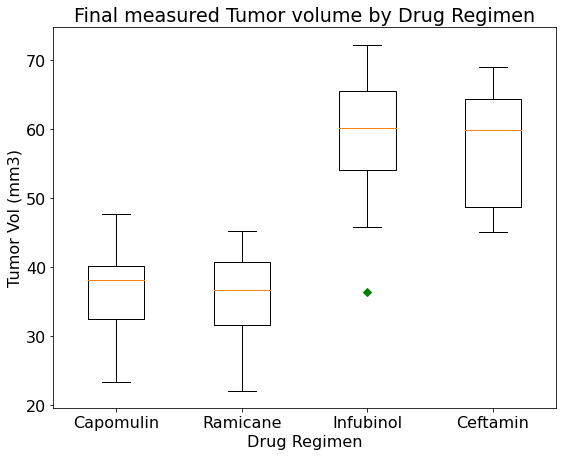

In [102]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)

# Save the figure
#plt.savefig("figures/BoxWhiskerPlot.png")

plt.show()

In [103]:
# Create a dataframe for only the Capomulin data
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [104]:
# Groupby timepoint and then get the mean of the tumor volume and 
# sem just for kicks (since no scientist would plot a line graph without error bars)

cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', stats.sem)).round(3)

# View the groupby dataframe 
cap_time_tumor.head(10)


,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882
30,38.769,0.934
35,37.817,1.052
40,36.958,1.224


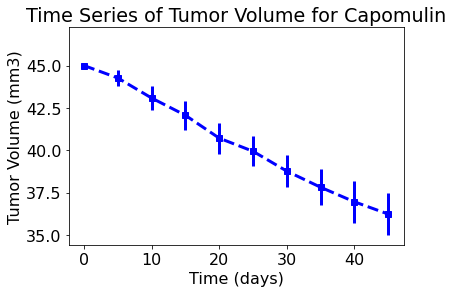

In [105]:

# get the values for the x axis
time_series = list(cap_time_tumor.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    time_series,  # X values
    cap_time_tumor['Tumor_Vol_Mean'], # Y values
    yerr=cap_time_tumor['Tumor_Vol_SEM'],     # Y-errors
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs--", # format line using dashed lines for plot()
    linewidth=3  # width of plot line
    )
# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

# Save the figure
#plt.savefig("figures/LineChart.png")

plt.show()

In [106]:
# View Capomulin dataframe
capomulin_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [107]:
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(30)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


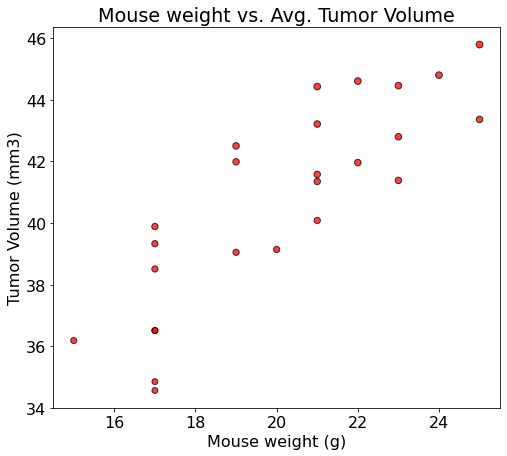

In [108]:
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save the figure
#plt.savefig("figures/ScatterWeightTumorVol.png")

plt.show()

In [109]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = stats.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.841946102026108
The equation of the regression line is: y = 0.95x + 21.55


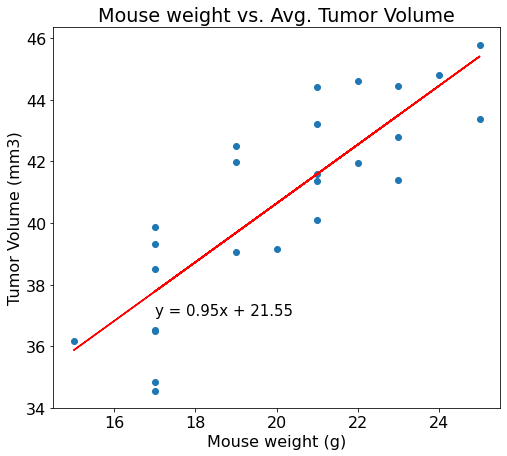

In [110]:
# Print out the r-squared value along with the plot.
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
line= (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
#plt.savefig("figures/ScatterWeightTumorVolRegression.png")

plt.show()


In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = drug_group["Metastatic Sites"].count()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df = mice_count_df.reset_index(level=['Drug Regimen', 'Timepoint'])
# Preview DataFrame
mice_count_df = mice_count_df.rename(columns={"Metastatic Sites":"Mice Count"})
mice_count_df.head()


,Drug Regimen,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:

# We can Include Survival Rate depending on Mice Count in data frame
mice_count_df["Survival Rate"] = ((mice_count_df["Mice Count"])/25)*100
mice_count_df


,Drug Regimen,Timepoint,Mice Count,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0
...,...,...,...,...
95,Zoniferol,25,16,64.0
96,Zoniferol,30,15,60.0
97,Zoniferol,35,14,56.0
98,Zoniferol,40,14,56.0


In [26]:

# Reformat data frames using only Survival Rate
reformatted_surv = pd.DataFrame(mice_count_df.iloc[0:10, 1]).set_index("Timepoint")
num_drugs = 10
for i in range(0, num_drugs):
    reformatted_surv[mice_count_df.iloc[(i*num_drugs),0]] = mice_count_df.iloc[(i*num_drugs):((i*num_drugs) + num_drugs),[1, 3]].set_index("Timepoint")
# Preview that Reformatting worked
reformatted_surv





,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,96.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,92.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,84.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,84.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,76.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,72.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,68.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,60.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


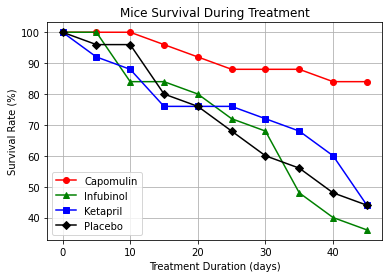

In [28]:

# Generate the Plot (Accounting for percentages)
plt.plot(timepoints, reformatted_surv["Capomulin"], marker='o', color="red", label = "Capomulin")
plt.plot(timepoints, reformatted_surv["Infubinol"], marker='^', color="green", label = "Infubinol")
plt.plot(timepoints, reformatted_surv["Ketapril"], marker='s', color="blue", label = "Ketapril")
plt.plot(timepoints, reformatted_surv["Placebo"], marker='D', color="black", label = "Placebo")
# Format the Figure
plt.title("Mice Survival During Treatment")
plt.legend(loc="Best")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
# Show the Figure
#plt.savefig("Images/Survival.png")STILL TRYING TO FIGURE OUT HOW TO SAVE THESE...
plt.show()

In [29]:

tumor_avg_df.iloc[(2*num_drugs + num_drugs),2]  
#tumor_avg_df.iloc[i*num_drugs, 2]

45.0